# DSC 540 Weeks 7 & 8

## Exercise 1

In [57]:
import re
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

url = "https://www.gutenberg.org/browse/scores/top"

def gethtml(url):
    html = ""
    try:
        response = requests.get(url)
        html = response.text
    except requests.ConnectionError as e:
        print(e)
        sys.exit(1)
    return html

soup = BeautifulSoup(gethtml(url), 'html.parser')

links = []

# Here, we get all 'a' tags with the 'href' attribute,
# and we also add the statement with re.compile to find all 
# that have a link starting with /ebooks
for book in soup.find_all('a',  
                          attrs={'href': re.compile("/ebooks")}):
    links.append(book)

links[:30]

[<a href="/ebooks/">Search and Browse
       	  <span class="drop-icon">▾</span>
 </a>,
 <a href="/ebooks/">Book Search</a>,
 <a href="/ebooks/bookshelf/">Bookshelves</a>,
 <a href="/ebooks/offline_catalogs.html">Offline Catalogs</a>,
 <a href="/ebooks/49010">Æsop's Fables: A Version for Young Readers by Aesop and J. H.  Stickney (6252)</a>,
 <a href="/ebooks/1513">Romeo and Juliet by William Shakespeare (2814)</a>,
 <a href="/ebooks/2701">Moby Dick; Or, The Whale by Herman Melville (2408)</a>,
 <a href="/ebooks/145">Middlemarch by George Eliot (1900)</a>,
 <a href="/ebooks/2641">A Room with a View by E. M.  Forster (1881)</a>,
 <a href="/ebooks/100">The Complete Works of William Shakespeare by William Shakespeare (1825)</a>,
 <a href="/ebooks/37106">Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott (1823)</a>,
 <a href="/ebooks/16389">The Enchanted April by Elizabeth Von Arnim (1677)</a>,
 <a href="/ebooks/67979">The Blue Castle: a novel by L. M.  Montgomery (1648)</a>,
 <

In [19]:
# We can remove the first 4 elements since they are not book links
links = links[4:]

fileNums = []
for tag in links:
    # Use regex to find numbers in the text value of the 'href'
    # attribute.
    num = re.findall(r'\d+', tag['href'])

    # Add these to a new arraylist
    fileNums.append(num)

In [20]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Ways to donate







To determine the ranking we count the times each file gets downloaded.
Both HTTP and FTP transfers are counted.
Only transfers from ibiblio.org are counted as we have no access to our mirrors log files.
Multiple downloads from the same IP address on the same day count as one download.
IP addresses that download more than 100 files a day are considered
robots and are not considered.
Books made out o

In [45]:
import io
from io import StringIO
s = soup.text.splitlines()

titles = []

for line in s:
    title = re.findall(r'.*[0−9]+[0-9]+', line)
    if title != []:
        titles.append(title)

In [46]:
titles

[["Æsop's Fables: A Version for Young Readers by Aesop and J. H.  Stickney (6252)"],
 ['Romeo and Juliet by William Shakespeare (2814)'],
 ['Moby Dick; Or, The Whale by Herman Melville (2408)'],
 ['Middlemarch by George Eliot (1900)'],
 ['A Room with a View by E. M.  Forster (1881)'],
 ['The Complete Works of William Shakespeare by William Shakespeare (1825)'],
 ['Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott (1823)'],
 ['The Enchanted April by Elizabeth Von Arnim (1677)'],
 ['The Blue Castle: a novel by L. M.  Montgomery (1648)'],
 ['Pride and Prejudice by Jane Austen (1601)'],
 ['The Adventures of Ferdinand Count Fathom — Complete by T.  Smollett (1519)'],
 ['The Adventures of Roderick Random by T.  Smollett (1501)'],
 ['History of Tom Jones, a Foundling by Henry Fielding (1498)'],
 ['Cranford by Elizabeth Cleghorn Gaskell (1493)'],
 ['The Expedition of Humphry Clinker by T.  Smollett (1490)'],
 ['Twenty years after by Alexandre Dumas and Auguste Maquet (1471)'],
 ['M

## Exercise 2

In [63]:
import urllib.request
import urllib.parse
import urllib.error
import json
import os

with open('APIkeys.json') as f:
    keys = json.load(f)
    omdKeys = keys['key']
    
url = 'http://www.omdbapi.com/?'

apikey = '&apikey=' + omdKeys


In [64]:
def print_json(jsonData):
    listKeys = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']

    for k in listKeys:
        if k in list(jsonData.keys()):
            print(f"{k}: {jsonData[k]}")

In [65]:
def save_poster(jsonData):
    title = jsonData['Title']
    jsonurl = jsonData['Poster']

    # Gets file extension from url, taking last string 
    # after a period
    extension = poster_url.split('.')[-1]

    posterData = urllib.request.urlopen(poster_url).read()

    # Save location in this working directory plus posters
    location = os.getcwd()+'\\'+'Posters'+'\\'

    # Make directory if it does not exist
    if not os.path.isdir(location):
        os.mkdir(location)
    
    filename = location + str(title) + '.' + extension
    f=open(filename,'wb')
    f.write(posterData)
    f.close()

In [66]:
def search_movie(title):
    try:
        # Movie url, which is the working URL plus title and apikey
        movieUrl = url + urllib.parse.urlencode({'t': str(title)}) + apikey
        
        # Load JSON data into jsonData
        request = urllib.request.urlopen(movieUrl)
        data = request.read()
        jsonData = json.loads(data)

        # If there is data, print it, otherwise throw error
        if jsonData['Response'] == 'True':
            print_json(jsonData)
        else:
            print(jsonData['Error'])
    
    except urllib.error.URLError as e:
        print(e.reason)

In [67]:
search_movie('Titanic')

Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,292,276
imdbID: tt0120338


## API data pull

In [70]:
response = requests.get("https://api-server.dataquest.io/economic_data/countries") 
data = response.json()  
data

'[{"country_code": "ABW", "short_name": "Aruba", "table_name": "Aruba", "long_name": "Aruba", "2-alpha_code": "AW", "currency_unit": "Aruban florin", "special_notes": null, "region": "Latin America & Caribbean", "income_group": "High income", "wb-2_code": "AW", "national_accounts_base_year": "2013", "national_accounts_reference_year": null, "sna_price_valuation": "Value added at basic prices (VAB)", "lending_category": null, "other_groups": null, "system_of_national_accounts": "Country uses the 1993 System of National Accounts methodology", "alternative_conversion_factor": null, "ppp_survey_year": null, "balance_of_payments_manual_in_use": "BPM6", "external_debt_reporting_status": null, "system_of_trade": "General trade system", "government_accounting_concept": null, "imf_data_dissemination_standard": "Enhanced General Data Dissemination System (e-GDDS)", "latest_population_census": "2020 (expected)", "latest_household_survey": null, "source_of_most_recent_income_and_expenditure_data":

C:\Users\Arbaz\AppData\Local\Temp\ipykernel_9672\3391779012.py:3: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("MetObjects.csv")


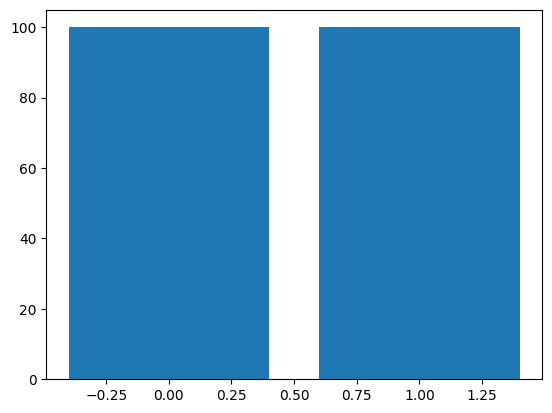

In [76]:
import matplotlib.pyplot as plt

df = pd.read_csv("MetObjects.csv")
# Drop rows with missing Wikidata URL values
df = df[df['Object Wikidata URL'].notna()]

plt.bar(df["Is Highlight"], height = 100)
plt.show()

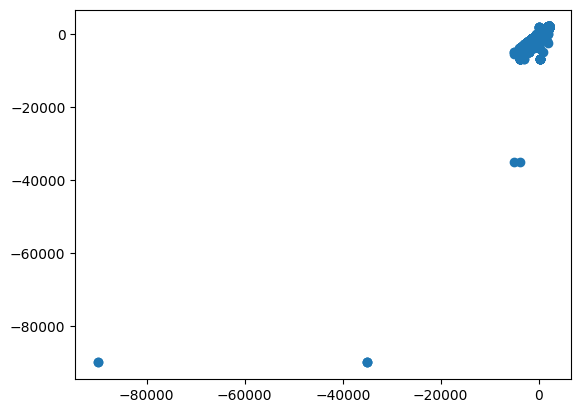

In [79]:
plt.scatter(df["Object End Date"], df["Object Begin Date"])
plt.show()

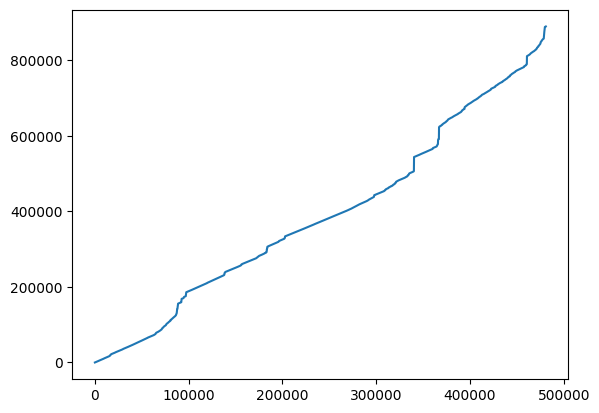

In [78]:
plt.plot(df['Object ID'])